Student Name: Jay Jun Lee

Student ID: 

Task 1: Exploratory Data Analysis (EDA)

Tasks
Dataset to use in the tasks below: bank.csv

This dataset is an excerpt of the Bank Marketing dataset from the UCI repository. Please refer to the description of the dataset at the UCI repository for understanding the meaning of the columns.

Input variables:
   # bank client data:
   1 - age (numeric)
 
 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
  
  3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  
  4 - education (categorical: "unknown","secondary","primary","tertiary")
  
  5 - default: has credit in default? (binary: "yes","no")
  
  6 - balance: average yearly balance, in euros (numeric) 
  
  7 - housing: has housing loan? (binary: "yes","no")
  
  8 - loan: has personal loan? (binary: "yes","no")
  
  # related with the last contact of the current campaign:
  
  9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
 
 # other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Task 1: Exploratory Data Analysis (EDA)
Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).

How does the distribution of account balances vary across different age in the dataset, and is there a relationship between age and balance?

 # Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

For numerical attributes like age, balance, duration, etc., calculate descriptive statistics such as mean, median, minimum, maximum, and standard deviation.

For categorical attributes like job, marital status, education, etc., calculate frequency counts and proportions for each category.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("bank.csv")

In [8]:
# Calculate the statistics for numerical attributes
numerical_stats = data.describe()

# Coun the frequency  /proportion for categorical attributes
categorical_stats = {}
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
for column in categorical_columns:
    counts = data[column].value_counts()
    proportions = counts / counts.sum()
    categorical_stats[column] = pd.DataFrame({'Counts': counts, 'Proportion': proportions})

# Numerical statistics
print("Descriptive Statistics for Numerical Attributes:")
print(numerical_stats)

# Categorical statistics
print("\nFrequency Counts and Proportions for Categorical Attributes:")
for column, stats in categorical_stats.items():
    print(f"\n{column.capitalize()}:")
    print(stats)

Descriptive Statistics for Numerical Attributes:
               age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max

Conclusion:


 # Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).

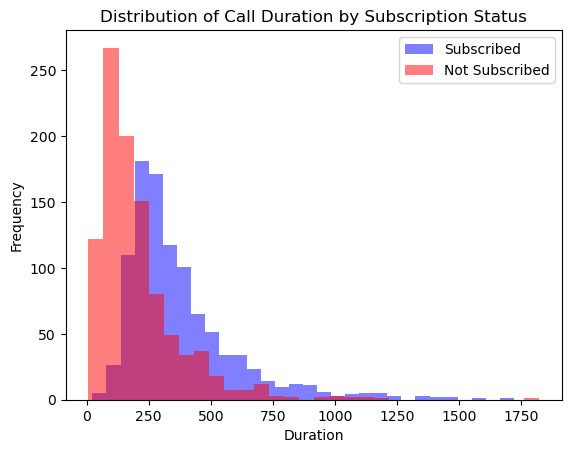

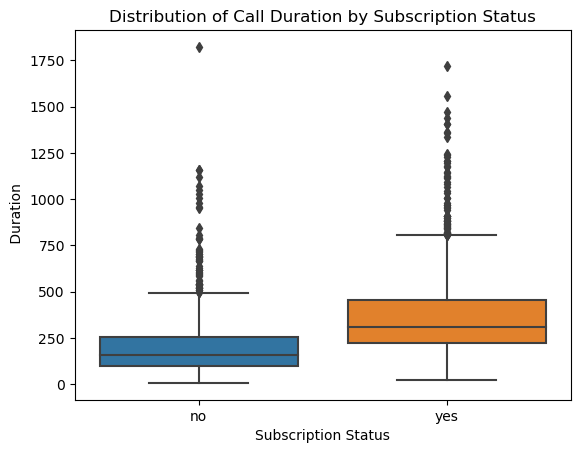

In [43]:
# Histogram
plt.hist(data[data['subscribed'] == 'yes']['duration'], bins=30, alpha=0.5, label='Subscribed', color='blue')
plt.hist(data[data['subscribed'] == 'no']['duration'], bins=30, alpha=0.5, label='Not Subscribed', color='red')
plt.title('Distribution of Call Duration by Subscription Status')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Boxplot
sns.boxplot(x='subscribed', y='duration', data=data)
plt.title('Distribution of Call Duration by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel(' Duration')
plt.show()

Conclusions: 
The histogram displays a positively skewed distribution for call duration, indicating that most calls were on the side of the shorter duration. The boxplot highlights that subscribed customers tend to have longer call durations compared to non-subscribed customers.

# Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

 ## Task 2: Data Preparation


In the same Jupyter notebook etivity1.ipynb, continue with preparing the bank dataset for machine learning by following the notebook Tutorial 1-2 - Data Preparation.ipynb as an example.

Ensure that you have:

encoded all categorical attributes as numerical,

filled in all missing values,

applied a scaler to rescale features,

treated outliers and skewed attribute distribution appropriately,

created at least one new feature from the existing ones.

Shortly describe and justify the data preparation choices you have made in markdown cells.

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bank_copy.csv")

In [76]:
# Define numerical and categorical attributes
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Overview of the data again

In [83]:
# Calculate the statistics for numerical attributes
numerical_cols = data.describe()

# Coun the frequency  /proportion for categorical attributes
categorical_stats = {}
for column in categorical_cols:
    counts = data[column].value_counts()
    proportions = counts / counts.sum()
    categorical_stats[column] = pd.DataFrame({'Counts': counts, 'Proportion': proportions})

# Numerical statistics
print("Descriptive Statistics for Numerical Attributes:")
print(numerical_stats)

# Categorical statistics
print("\nFrequency Counts and Proportions for Categorical Attributes:")
for column, stats in categorical_stats.items():
    print(f"\n{column.capitalize()}:")
    print(stats)

Descriptive Statistics for Numerical Attributes:
               age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max